<a href="https://colab.research.google.com/github/Maria-mbugua/IPWeek6-Core/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Learning with Exploratory Data Analysis**

# **1) Defining the Question**


You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training). You have two possible approaches (polynomial and logistic approaches) given the datasets that will be provided


## a) Specifying the Question

Mchezo pesa is a football analyst company in East Africa. Mchezo-Pesa would like to predict the result of a game based whether the teams playing are in their home country or not and whether the game is friendly or not.

## b) Defining the metrics for success


This project will be successful when:
1)We accurately predict the winning team based on the two factors:

   a)Home team or away team

   b)The type of tournament 

2)The model achieves atleast 80% accuracy

3)Have the lowest RMSE score possible

## c)  Understanding the context

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.Predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

## e) Recording the Experimental Design


1. reading in the datasets
2. checking the data for duplicates and missinng data
3. dropping of duplicates and removal filling in of missing data values with zero
4. Finding  and dealing with outliers, anomalies, and missing data within the dataset.
5. Performing of EDA recording of observations.
6. Implementing the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
8. Perform any necessary feature engineering 

9. Check of multicollinearity

10. Start building the model, Cross-validate the model

11. Compute RMSE

12. Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test

13. Perform appropriate regressions on the data including your justification

14. Challenge your solution by providing insights on how you can make improvements.

## e) Relevance of the data

The data that was used for survey was obtained from an open datasource. This data is an aggregation by day of the number of goals scored and rankings of countries in the men's FIFA team. With it's a model that determines which team gets to be ranked where and how according to the years and goals.

# **2) Reading the Data**

In [ ]:
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# reading datasets

data = pd.read_csv('fifa_ranking.csv')


In [ ]:
# reading datasets

data1 = pd.read_csv('results.csv')
data1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


In [ ]:
# Loading the FiFa results Dataset while specifying the datetime column
data1 = pd.read_csv('results.csv',parse_dates=['date'])
data1.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


# **3) Cleaning the Data**

In [ ]:
# Renaming the country full column to country
data.rename(columns= {'country_full':'country'}, inplace = True)

In [ ]:
# droppig unnecessary columns
to_drop = ['country_abrv', 'rank_date']
data.drop(to_drop, axis=1, inplace=True)

In [ ]:
# Displaying the columns
data.columns

Index(['rank', 'country', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation'],
      dtype='object')

In [ ]:
# Displaying the shape of the dataset
data.shape

(57793, 14)

In [ ]:
# Checking for duplicates
data.duplicated().any()

True

In [ ]:
# Dropping  all duplicates
data.drop_duplicates(inplace=True)

In [ ]:
# Checking total number of duplicates
data.duplicated().sum()


0

In [ ]:
# Checking for null values
data.isnull().any()

rank                       False
country                    False
total_points               False
previous_points            False
rank_change                False
cur_year_avg               False
cur_year_avg_weighted      False
last_year_avg              False
last_year_avg_weighted     False
two_year_ago_avg           False
two_year_ago_weighted      False
three_year_ago_avg         False
three_year_ago_weighted    False
confederation              False
dtype: bool

In [ ]:
# Checking for duplicates
data1.duplicated().any()

False

In [ ]:
# Checking for null values
data1.isnull().any()

date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
country       False
neutral       False
dtype: bool

In [ ]:
#merging datasets
frames = [data, data1]
df = pd.concat(frames)
df

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,...,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1.0,Germany,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Italy,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Switzerland,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Sweden,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Argentina,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,CONMEBOL,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,NaN,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-07-18,American Samoa,Tahiti,8.0,1.0,Pacific Games,Apia,True
40835,NaN,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-07-18,Fiji,Solomon Islands,4.0,4.0,Pacific Games,Apia,True
40836,NaN,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-07-19,Senegal,Algeria,0.0,1.0,African Cup of Nations,Cairo,True
40837,NaN,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-07-19,Tajikistan,North Korea,0.0,1.0,Intercontinental Cup,Ahmedabad,True


In [ ]:
# Displaying the top of our dataset
df.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,...,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1.0,Germany,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Italy,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Switzerland,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Sweden,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Argentina,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,CONMEBOL,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking for null values
df.isnull().any()

rank                        True
country                    False
total_points                True
previous_points             True
rank_change                 True
cur_year_avg                True
cur_year_avg_weighted       True
last_year_avg               True
last_year_avg_weighted      True
two_year_ago_avg            True
two_year_ago_weighted       True
three_year_ago_avg          True
three_year_ago_weighted     True
confederation               True
date                        True
home_team                   True
away_team                   True
home_score                  True
away_score                  True
tournament                  True
city                        True
neutral                     True
dtype: bool

In [ ]:
# Finding shape of the dataset
df.shape

(95228, 22)

In [ ]:
# Reading columns
df.columns

Index(['rank', 'country', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral'],
      dtype='object')

In [ ]:
# Finding shape of the dataset
df.shape

(95228, 22)

In [ ]:
# Previewing dataset
df.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,...,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1.0,Germany,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Italy,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Switzerland,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Sweden,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Argentina,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,CONMEBOL,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Displaying the bottom of our dataset
df.tail()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,...,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
40834,NaN,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-07-18,American Samoa,Tahiti,8.0,1.0,Pacific Games,Apia,True
40835,NaN,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-07-18,Fiji,Solomon Islands,4.0,4.0,Pacific Games,Apia,True
40836,NaN,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-07-19,Senegal,Algeria,0.0,1.0,African Cup of Nations,Cairo,True
40837,NaN,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-07-19,Tajikistan,North Korea,0.0,1.0,Intercontinental Cup,Ahmedabad,True
40838,NaN,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-07-20,Papua New Guinea,Fiji,1.0,1.0,Pacific Games,Apia,True


In [ ]:
# Displaying a sample of our dataset
df.sample(7)

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,...,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
23995,NaN,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2001-06-03,Argentina,Colombia,3.0,0.0,FIFA World Cup qualification,Buenos Aires,False
496,164.0,Chad,0.00,0.0,-1.0,0.0,0.0,0.00,0.00,0.00,...,0.00,CAF,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30794,147.0,Swaziland,0.00,113.0,0.0,0.0,0.0,0.00,0.00,0.00,...,0.00,CAF,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30485,NaN,Iran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2008-08-13,Iran,Syria,2.0,0.0,WAFF Championship,Teheran,False
7971,NaN,Iraq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1971-11-19,Iraq,Kuwait,3.0,1.0,Friendly,Baghdad,False
33568,NaN,Slovenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2011-10-11,Slovenia,Serbia,1.0,0.0,UEFA Euro qualification,Maribor,False
45068,89.0,Armenia,407.64,421.0,1.0,107.5,107.5,335.09,167.54,319.69,...,36.69,UEFA,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95228 entries, 0 to 40838
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     54389 non-null  float64       
 1   country                  95228 non-null  object        
 2   total_points             54389 non-null  float64       
 3   previous_points          54389 non-null  float64       
 4   rank_change              54389 non-null  float64       
 5   cur_year_avg             54389 non-null  float64       
 6   cur_year_avg_weighted    54389 non-null  float64       
 7   last_year_avg            54389 non-null  float64       
 8   last_year_avg_weighted   54389 non-null  float64       
 9   two_year_ago_avg         54389 non-null  float64       
 10  two_year_ago_weighted    54389 non-null  float64       
 11  three_year_ago_avg       54389 non-null  float64       
 12  three_year_ago_weighted  54389 n

In [ ]:
# Checking for duplicates
df.duplicated().any()

False

In [ ]:
# Dropping all duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Displaying total number of duplicates
df.duplicated().sum()

0

In [ ]:
# Checking for null values
df.isnull().any()

rank                        True
country                    False
total_points                True
previous_points             True
rank_change                 True
cur_year_avg                True
cur_year_avg_weighted       True
last_year_avg               True
last_year_avg_weighted      True
two_year_ago_avg            True
two_year_ago_weighted       True
three_year_ago_avg          True
three_year_ago_weighted     True
confederation               True
date                        True
home_team                   True
away_team                   True
home_score                  True
away_score                  True
tournament                  True
city                        True
neutral                     True
dtype: bool

In [ ]:
# Filling null values with zero
df.fillna(0, inplace=True)

In [ ]:
# Dealing with the Missing Data
df.isnull().sum()

rank                       0
country                    0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
neutral                    0
dtype: int64

In [ ]:
# dealing with outliers
# quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(df1.shape)

# Printing the shape of our old dataset
# ---
#
print(df.shape)

(34520, 22)
(95228, 22)


In [ ]:
# top football confederations
print('Total number of confederations: {0}'.format(df1['confederation'].nunique()))
print(df1['confederation'].value_counts().head(10))
print('--'*40)

Total number of confederations: 7
0           26356
CAF          2054
UEFA         2035
AFC          1759
CONCACAF     1434
OFC           470
CONMEBOL      412
Name: confederation, dtype: int64
--------------------------------------------------------------------------------


#**4) Exploratory Data Analysis**

## a) Univariate Analysis

Text(0.5, 1.0, 'Distribution of countries per their homescores')

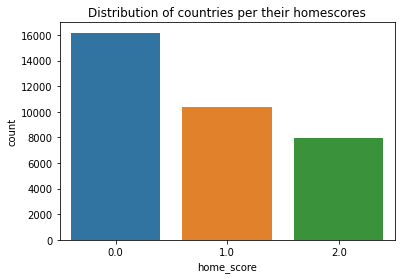

In [ ]:
# Histogram of the home scores of different countries
ax = sns.countplot(df1['home_score'], order = df1['home_score'].value_counts().index)
plt.title('Distribution of countries per their homescores')

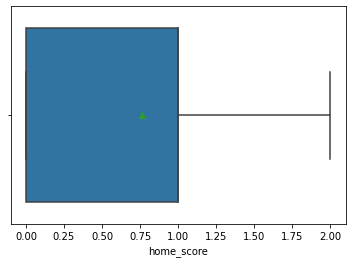

In [ ]:
# Boxplot of home score
sns.boxplot(df1['home_score'], showmeans=True)

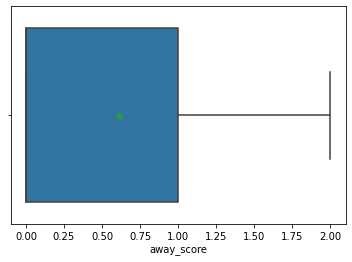

In [ ]:
# Boxplot of away scores
sns.boxplot(df1['away_score'], showmeans=True)

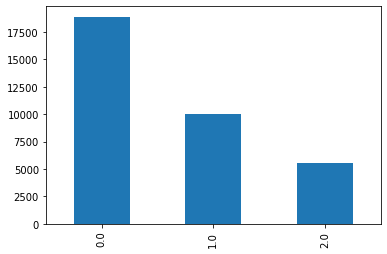

In [ ]:
# Bar plot of away scores
df1['away_score'].value_counts().sort_index().plot.bar()

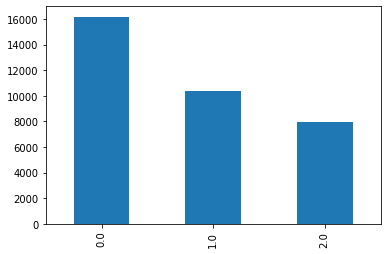

In [ ]:
# Bar plot of home scores
df1['home_score'].value_counts().sort_index().plot.bar()

In [ ]:
# Skewness
print(df1.skew())

rank                       2.033130
total_points               0.000000
previous_points            2.654479
rank_change                0.000000
cur_year_avg               0.000000
cur_year_avg_weighted      0.000000
last_year_avg              0.000000
last_year_avg_weighted     0.000000
two_year_ago_avg           0.000000
two_year_ago_weighted      0.000000
three_year_ago_avg         0.000000
three_year_ago_weighted    0.000000
home_score                 0.454146
away_score                 0.761499
neutral                    1.599769
dtype: float64


In [ ]:
# Kurtosis
print(df1.kurt())

rank                       2.643261
total_points               0.000000
previous_points            6.012138
rank_change                0.000000
cur_year_avg               0.000000
cur_year_avg_weighted      0.000000
last_year_avg              0.000000
last_year_avg_weighted     0.000000
two_year_ago_avg           0.000000
two_year_ago_weighted      0.000000
three_year_ago_avg         0.000000
three_year_ago_weighted    0.000000
home_score                -1.304573
away_score                -0.833384
neutral                    0.559292
dtype: float64


In [ ]:
df1.columns

Index(['rank', 'country', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral'],
      dtype='object')

In [ ]:
# Dropping unnecessary columns
to_drop = ['rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted']
df1.drop(to_drop, axis=1, inplace=True)

In [ ]:
# Shape of our dataset
df1.shape

(34520, 13)

## b) Bivariate Analysis

In [ ]:
# Calculating the pearson coefficient
pearson_coeff = df1["home_score"].corr(df1["away_score"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df1["home_score"].corr(df1["away_score"])
print(coeff)

0.23873779888274616
0.23873779888274616


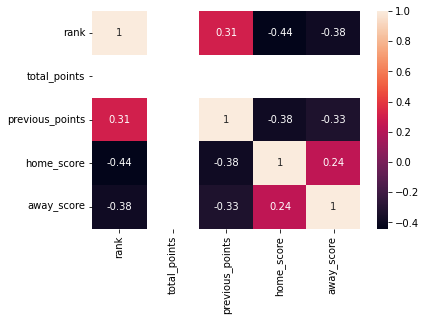

In [ ]:
# heatmap
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [ ]:
# Displaying a sample of the dataset
df1.sample(6)

,rank,country,total_points,previous_points,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
21417,8.0,Turkey,0.0,743.0,UEFA,0,0,0,0.0,0.0,0,0,0
2192,0.0,Haiti,0.0,0.0,0,1939-03-15 00:00:00,Haiti,Panama,1.0,0.0,Friendly,Port-au-Prince,False
20005,0.0,Portugal,0.0,0.0,0,1996-11-09 00:00:00,Portugal,Ukraine,1.0,0.0,FIFA World Cup qualification,Porto,False
31597,0.0,Austria,0.0,0.0,0,2009-10-10 00:00:00,Austria,Lithuania,2.0,1.0,FIFA World Cup qualification,Innsbruck,False
2,0.0,Scotland,0.0,0.0,0,1874-03-07 00:00:00,Scotland,England,2.0,1.0,Friendly,Glasgow,False
34409,0.0,Lebanon,0.0,0.0,0,2012-09-11 00:00:00,Lebanon,Iran,1.0,0.0,FIFA World Cup qualification,Beirut,False


In [ ]:
# Displaying the dataset information
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34520 entries, 0 to 40838
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             34520 non-null  float64
 1   country          34520 non-null  object 
 2   total_points     34520 non-null  float64
 3   previous_points  34520 non-null  float64
 4   confederation    34520 non-null  object 
 5   date             34520 non-null  object 
 6   home_team        34520 non-null  object 
 7   away_team        34520 non-null  object 
 8   home_score       34520 non-null  float64
 9   away_score       34520 non-null  float64
 10  tournament       34520 non-null  object 
 11  city             34520 non-null  object 
 12  neutral          34520 non-null  object 
dtypes: float64(5), object(8)
memory usage: 4.7+ MB


In [ ]:
# Correlation of the home score and away score
df1['home_score'].corr(df1['away_score'])

0.23873779888274616

## c) Multivariate Analysis

### Factor Analysis

In [ ]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

#The p vlaue is 0 the observed matrix is not an identity matrix.

(nan, nan)

### Principal Component Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1[['home_score','away_score']])
scaled_data = scaler.transform(df1[['home_score','away_score']])

In [ ]:
scaled_data = pd.DataFrame(scaled_data)

In [ ]:
df2 = scaled_data.fillna(0)
df2.head()

,0,1
0,-0.950755,-0.821526
1,-0.950755,-0.821526
2,-0.950755,-0.821526
3,-0.950755,-0.821526
4,-0.950755,-0.821526


In [ ]:
from sklearn.decomposition import PCA
logmodel = PCA(n_components=2)
logmodel.fit(df2)
pca_x = logmodel.transform(df2)

In [ ]:
pca_x.shape

(34520, 2)

In [ ]:
df3 = pd.DataFrame(logmodel.components_, columns = ['home_score','away_score'])

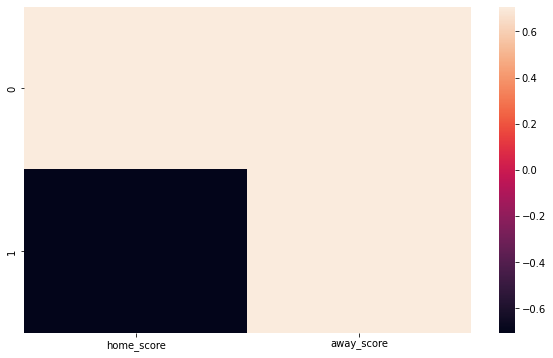

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df3)

Text(0.5, 0, 'First Principle Component ')

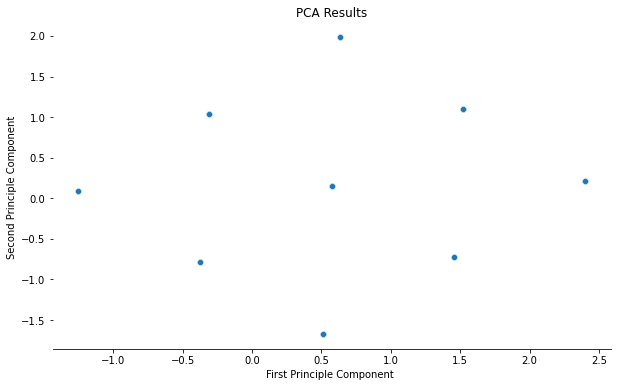

In [ ]:
plt.figure(figsize=(10,6))
ty=sns.scatterplot(pca_x[:,0], pca_x[:,1])
sns.despine(left=True)
ty.set_title('PCA Results')
ty.set_ylabel('Second Principle Component ')
ty.set_xlabel('First Principle Component ')

In [ ]:
pca_x

array([[-1.25319172,  0.0913784 ],
       [-1.25319172,  0.0913784 ],
       [-1.25319172,  0.0913784 ],
       ...,
       [-0.3083254 ,  1.03624472],
       [-0.3083254 ,  1.03624472],
       [ 0.57347718,  0.15444214]])

# **5) Polynomial Regression Analysis**

In [ ]:
#Import libaries
import datetime
import operator
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import Markdown as md
from datetime import date, timedelta, datetime
from numpy import sqrt
from pandas import read_csv, to_datetime
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [ ]:
# Shape of the dataset
df1.shape

(34520, 13)

In [ ]:
# Displaying the datatypes of our datasets
df1.dtypes

rank               float64
country             object
total_points       float64
previous_points    float64
confederation       object
date                object
home_team           object
away_team           object
home_score         float64
away_score         float64
tournament          object
city                object
neutral             object
dtype: object

In [ ]:
df5 = df1
df5.head()

,rank,country,total_points,previous_points,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1.0,Germany,0.0,57.0,UEFA,0,0,0,0.0,0.0,0,0,0
1,2.0,Italy,0.0,57.0,UEFA,0,0,0,0.0,0.0,0,0,0
3,4.0,Sweden,0.0,55.0,UEFA,0,0,0,0.0,0.0,0,0,0
5,6.0,Republic of Ireland,0.0,54.0,UEFA,0,0,0,0.0,0.0,0,0,0
19,20.0,Poland,0.0,45.0,UEFA,0,0,0,0.0,0.0,0,0,0


In [ ]:
df5.columns

Index(['rank', 'country', 'total_points', 'previous_points', 'confederation',
       'date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral'],
      dtype='object')

In [ ]:
# dropping unnecessary columns
to_drop = ['country', 'total_points', 'previous_points', 'confederation', 'date',  'tournament', 'city', 'neutral']
 #       'confederation', 'date',
 #      'tournament', 'city', 'neutral']
df5.drop(to_drop, axis=1, inplace=True)

In [ ]:
print(df5)

#Get the 2 and the last column from the dataset 
X = df5.iloc[:, 3:4].values
y = df5.iloc[:, 4].values
print(X)
print(y)

       rank         home_team    away_team  home_score  away_score
0       1.0                 0            0         0.0         0.0
1       2.0                 0            0         0.0         0.0
3       4.0                 0            0         0.0         0.0
5       6.0                 0            0         0.0         0.0
19     20.0                 0            0         0.0         0.0
...     ...               ...          ...         ...         ...
40829   0.0             India        Syria         1.0         1.0
40830   0.0           Tunisia      Nigeria         0.0         1.0
40836   0.0           Senegal      Algeria         0.0         1.0
40837   0.0        Tajikistan  North Korea         0.0         1.0
40838   0.0  Papua New Guinea         Fiji         1.0         1.0

[34520 rows x 5 columns]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]
[0. 0. 0. ... 1. 1. 1.]


In [ ]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg2=PolynomialFeatures(degree=2)
X_poly=poly_reg2.fit_transform(X)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression()

In [ ]:
poly_reg3=PolynomialFeatures(degree=3)
X_poly3=poly_reg3.fit_transform(X)
lin_reg_3=LinearRegression()
lin_reg_3.fit(X_poly3,y)

LinearRegression()

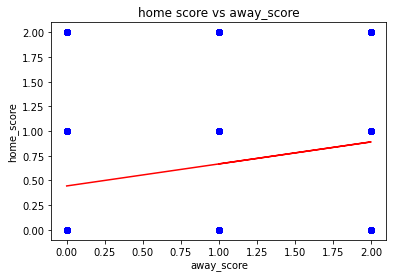

In [ ]:
# Visualize the Linear Regression results
plt.scatter(X, y, color='blue')
plt.plot(X, lin_reg.predict(X), color='red')
plt.title('home score vs away_score')
plt.xlabel('away_score')
plt.ylabel('home_score')
plt.show()


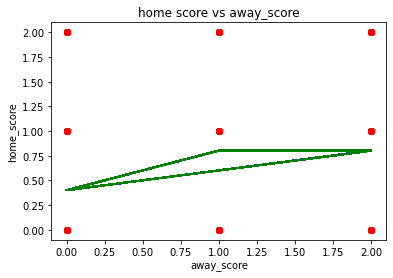

In [ ]:
# Visualize the polynomial Regression results
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg2.fit_transform(X)),color='blue')
plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='green')
plt.title('home score vs away_score')
plt.xlabel('away_score')
plt.ylabel('home_score')
plt.show()

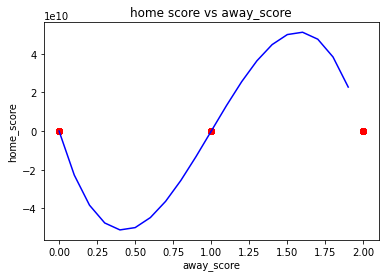

In [ ]:
X_grid=np.arange(min(X),max(X),0.1) # This will give us a vector.We will have to convert this into a matrix 
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X_grid,lin_reg_3.predict(poly_reg3.fit_transform(X_grid)),color='blue')
#plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='green')
plt.title('home score vs away_score')
plt.xlabel('away_score')
plt.ylabel('home_score')
plt.show()

In [ ]:
# dropping unnecessary columns
#to_drop = ['home_score', 'away_score']
#df5.drop(to_drop, axis=1, inplace=True)
#df5.drop(columns=['home_score', 'away_score'], axis=1, inplace=True)
#df5.head()


In [ ]:
df5.columns


Index(['rank', 'home_team', 'away_team', 'home_score', 'away_score'], dtype='object')

In [ ]:
# Model 1: Predict how many goals the home team scores.
lin_reg.predict([[6.5]])

array([1.89316118])

In [ ]:
# multicolinearity
correlations = df5.corr()
correlations

# the table below shows how the variables relate with each other. 
# there is very minimal correlation between the scores at home and away

,rank,home_score,away_score
rank,1.000000,-0.440243,-0.380404
home_score,-0.440243,1.000000,0.238738
away_score,-0.380404,0.238738,1.000000


In [ ]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,rank,home_score,away_score
rank,1.377763,0.510524,0.402226
home_score,0.510524,1.249613,-0.104124
away_score,0.402226,-0.104124,1.177867


In [ ]:
df5.rename(columns= {'home_score':'homescore', 'away_score':'awayscore'}, inplace = True)
df5.head()

,rank,home_team,away_team,homescore,awayscore
0,1.0,0,0,0.0,0.0
1,2.0,0,0,0.0,0.0
3,4.0,0,0,0.0,0.0
5,6.0,0,0,0.0,0.0
19,20.0,0,0,0.0,0.0


In [ ]:
# residual plots and heteroskedasticity testing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df5.values
y = df5['homescore'].values

X_train, X_test, homescore_train, homescore_test = train_test_split(X, y, test_size=0.4, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, homescore_train)

# This is our prediction for admission based on our model
homescore_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(homescore_predict, homescore_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-1.6193900783515012e-17

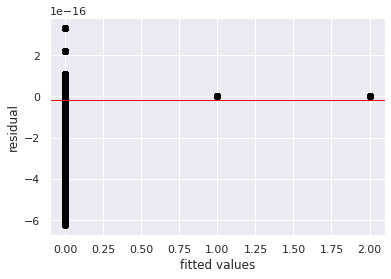

In [ ]:
# residual plot
import matplotlib.pyplot as plt

plt.scatter(homescore_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(homescore_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(homescore_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


inf
the variances are homogeneous!


In [ ]:
# Training and Cross Validation
# ---
# 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [ ]:
# Printing the accuracies returned for five folds 
# by the cross_val_score method by calling print on all_accuracies

print(all_accuracies.mean())

1.0


In [ ]:
# specify parameters and distributions to sample from
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [ ]:
#Instantiating RandomizedSearchCV object 
from sklearn.model_selection import RandomizedSearchCV 
random_sr = RandomizedSearchCV(classifier, param_dist, cv = 5) 

In [ ]:
#Calling the fit method
random_sr.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# Checking the parameters that return the highest accuracy

best_parameters = random_sr.best_params_
print(best_parameters)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_samples_split': 2}


In [ ]:
# Finding the obtained accuracy

best_result = random_sr.best_score_
print(best_result)


1.0


# **6) Logistics Regression Analysis**

In [ ]:
# dealing with outliers
# quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
df6 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(df6.shape)

# Printing the shape of our old dataset
# ---
#
print(df.shape)

(34520, 22)
(95228, 22)


In [ ]:
df6.columns

Index(['rank', 'country', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral'],
      dtype='object')

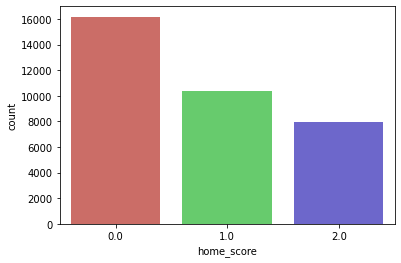

In [ ]:
import pandas as pd
import seaborn as sb
sb.countplot(x='home_score',data=df6, palette='hls')

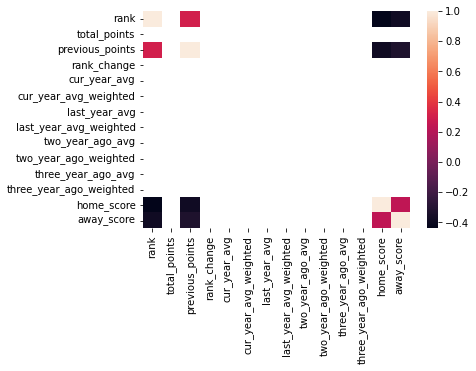

In [ ]:
# Checking for independence between features¶
# 
sb.heatmap(df6.corr())  

In [ ]:
# splitting our dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [ ]:
# fitting our model
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# using our model to make a prediction
y_pred = LogReg.predict(X_test)
y_pred

array([1., 1., 0., ..., 0., 0., 2.])

In [ ]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix


array([[4883,    0,    0],
       [   0, 3082,    0],
       [   0,    0, 2391]])

# **7) Discriminant Analysis**

In [ ]:
# Importing libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df4 = df1.fillna(0)
df4.shape

(34520, 5)

In [ ]:
X = df4.iloc[:, 0:4].values
y = df4.iloc[:2, ].values

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y)
X_test = lda.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# **8) Follow up Questions**

a) Did we have the right data?
No we didn't.

b) Do we need other data to answer our question?
Yes, More conclusive features should be included.

c) Did we have the right question?
Yes, Football is greatly loved sport and predicting the outcome of a match based on previous outcomes is an interesting task.

#**9) Conclusion**
Polynomial Regression and Logistic Regression do not produce an accurate model to predict the FIFA outcomes hence other Modelling techniques should be considered for the prediction.